### Read directly from fits
(files can be found [here](http://data.sdss3.org/sas/dr12/boss/lss/))

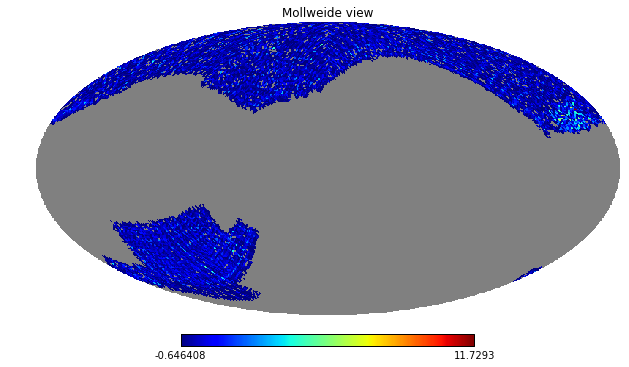

In [13]:
% matplotlib inline
import fitsio
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

NSIDE = 64

fn = '/Users/jh/Desktop/data/SDSS/data/mask_DR12v5_CMASS_North.fits'
fits = fitsio.FITS(fn)
theta = fits[1]['DECMID'][:]
phi = fits[1]['RAMID'][:]
theta = (-1)*theta*np.pi/180. + np.pi/2.
phi = phi*np.pi/180. 
r_C2G = hp.Rotator(coord=['C', 'G'])

theta, phi = r_C2G(theta, phi)

galMap = np.zeros(hp.nside2npix(NSIDE))
galPix = hp.ang2pix(NSIDE, theta, phi)

for pix in galPix:
    galMap[pix] += 1

galMap_Ngal = len(theta)
galMap_Npix = 0  ## keep track of the number of pixels covered
for i in xrange(len(galMap)):
    if galMap[i] == 0:
        galMap[i] = hp.UNSEEN
    else:
        galMap_Npix+=1

countMean = float(galMap_Ngal)/galMap_Npix

for i in xrange(len(galMap)):
    if galMap[i] != hp.UNSEEN:
        galMap[i] = (galMap[i] - countMean)/countMean
        
hp.mollview(galMap)
plt.show()

A link to github for converting ploygon to healpix.
[mango to healpix](https://github.com/mollyswanson/mangle/tree/master/masks/healpix)


Need Nside=256 data from [download](http://space.mit.edu/~molly/mangle/download/data.html) ro rasterize.